# conceptual:


## 1: Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of sales, TV, radio, and newspaper, rather than in terms of the coefficients of the linear model.

<img src="table_3-4.png">


The first p-value indicates whether the intercept is significant. That is, given the variance observed in this data, is it likely that the null hypothesis is correct, that these things have no impact on sales... now it's interesting, because the intercept value is what you get when all the predictors are zero. So, does this indicate that the mean of sales is significantly different from zero? Boring.

The second p-value is much more useful. It indicates that the coefficient for TV is significant, meaning, the effect of TV on sales is greater than we would expect by chance, at least in this model.

The same for the third and 4th, except newspapers' coef isn't significant at all. So its contribution to sales appears to be no greater than chance in this model.

## 2: Carefully explain the differences between the KNN classifier andKNN regression methods.

In a KNN classifier, you are identifying the k nearest neighbors, and each is giving a vote for their class membership, with majority winning. In a KNN regression, you are doing the same, but the neighbors are contributing their value which is then averaged.

## 3: Suppose we have a data set with five predictors,
    X1 = GPA, 
    X2 = IQ, 
    X3 =Gender (1 for Female and 0 forMale), 
    X4 =Interaction between GPA and IQ, and 
    X5 = Interaction between GPA and Gender. 
    The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model, and get 
    β0 = 50, 
    β1 = 20, 
    β2 = 0.07, 
    β3 = 35,  
    β4 = 0.01, 
    β5 = −10.
   

### a) which answer is correct and why?
    -  so since female is 1, X3 can be rephrase "impact of being female", and it appears to be significantly higher for females, however, there is an interaction between GPA and being female, which seems to be having an impact. Might be something like, women at high GPA earn more than men, while women at low GPA earn less than men.
    
    So, that would be iv.
    
### b) predict the salary of a female (what are you ferengi?) with IQ of 110, and GPA of 4.0.
    Salary = 50 + 20*(4.0) + .07(110) + 1 (35) + (4*110).01 - 4.0 * 1 (10)
    Which works out to 137.1, or 137100 starting salary. This did not happen to me. Guess 3.88 wasn't enough. :P
    
### c) since the coefficient for GPA/IQ is very small, there is little evidence of interaction.
    I would say this is false, because of the scale of the IQ term, and the scale of the predictor variable. anything that's going to have to be multiplied by 100 isn't going to be too big, or it'd be having way TOO large an effect.
    

## 4: I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +error.

### a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ǫ. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.
    - we would expect training to be lower, because the cubic is a more flexible model, and will be able to "explain more" even though that will actually just be overfitting to variability in the training set, irreflective of the true relationship.

### b) answer (a) using test rather than training 
    - we would expect the test RSS to be lower for linear, because the cubic regression will have to try to accomodate terms that don't match the true relationship.
    
### c) Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.   
    -  In this case, the training RSS for cubic regression should still be lower... unless it's exactly the midpoint between a linear and a cubic relationship. is that mathematically possible?
    
### d) answer (b) using test rather than training 
    - is this not the same as c? 

## 5 : no idea what they want here. whatever.

## 6: Using (3.4), argue that in the case of simple linear regression, the least squares line always passes through the point (x-bar, y-bar).

<img src="formula_3-4.png">

??? not sure on this one. skipping 7 too. pending calculus

# Applied

#auto dataset

In [1]:
#auto dataset
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

/Users/rcphillips/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df=pd.read_csv("../islir_exercises/islir_data/Auto.csv")
auto_df=df

In [3]:
df=pd.read_csv("../islir_exercises/islir_data/Auto.csv")
auto_df=df
no_ques_auto_df=auto_df[df.horsepower != '?']
print(auto_df.shape)
print(no_ques_auto_df.shape)
auto_df=no_ques_auto_df
y = auto_df.mpg.astype(int)

X = auto_df.horsepower.astype(int)

(397, 9)
(392, 9)


In [4]:
#convert horsepower to numeric
#auto_df.horsepower.astype(int)

In [5]:
#predict mpg using horsepower
y = auto_df.mpg.astype(int)

X = auto_df.horsepower.astype(int)
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

In [6]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     603.6
Date:                Thu, 04 Jan 2018   Prob (F-statistic):           3.27e-81
Time:                        09:33:03   Log-Likelihood:                -1174.9
No. Observations:                 392   AIC:                             2354.
Df Residuals:                     390   BIC:                             2362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6690      0.711     55.819      0.0

### Assessing the results:
    - R-squared of .64 is pretty good. Moreover, the coefficient for horsepower is significant. So yes, there is a relationship, a positive relationship.... such that as horsepower goes up, mpg goes up? that seems wrong.
    - statsmodels, what are you ON about? Apparently I have to add.
    "X = sm.add_constant(X)" before modelling, and then it will give me one of the most fundamental parts of one of the most fundamental models in history?
    
    - anyway. This massively changes the interpretation! Good! So.
    - It's still significant, but now there's a negative relationship. Also, the R-squared has gone down slightly. Still significant though.'
    
    

In sum, then:
    There is a significant negative relationship between mpg and horsepower, such that with every additional 1 horsepower, mpg decreases by 0.1568.

### What is the predicted mpg associated with a horsepower of 98? What are the associated 95% confidence and prediction intervals?
- running into some trouble with this one. I've fit a model, meaning I have my coefficients, and so I should be able to just calculate this, but that's not going to scale, so I want to see how statsmodels does it. There must be a way...



In [7]:
print(results.params)
answer = results.params[0]+ (results.params[1]*98)
print(answer)


const         39.668988
horsepower    -0.156848
dtype: float64
24.2978744028


Is this the best way? WEll, it's they way that didn't take me forEVER. 95% conf intervals?


In [8]:
results.conf_int()

,0,1
const,38.271759,41.066217
horsepower,-0.169400,-0.144296


So what is that telling us? Well, a confidence interval is telling us, based on the variability in the data (And assuming a normal distribution), the interval in which we can expect the true value to fall 95% of the time. So to get the confidence interval for this estimate... I'm not sure this is right, but, the lowest it can be is the low 95% intercept + the low 95% coefficient, and the highest the same.

so then


In [9]:
results.conf_int()

,0,1
const,38.271759,41.066217
horsepower,-0.169400,-0.144296


In [10]:
print(results.conf_int()[0][0])
low_conf_const = results.conf_int()[0][0]
print(results.conf_int()[0][1])
low_conf_horse = results.conf_int()[0][1]
print(results.conf_int()[1][0])
high_conf_const = results.conf_int()[1][0]
print(results.conf_int()[1][1])
high_conf_horse = results.conf_int()[1][1]

38.2717586763
-0.169399810338
41.0662165172
-0.144296377292


In [11]:
low_conf_answer = low_conf_const + low_conf_horse*98
high_conf_answer = high_conf_const + high_conf_horse*98
print('95% conf interval = ', low_conf_answer, ' - ', high_conf_answer)

95% conf interval =  21.6705772631  -  26.9251715426


In [12]:
sns.regplot(auto_df.horsepower.astype(int),auto_df.mpg.astype(int),  fit_reg=False)
sns.regplot(auto_df.horsepower.astype(int),results.predict(), fit_reg=False)

In [13]:
ax = sns.regplot(auto_df.horsepower.astype(int),results.resid,fit_reg=False)
ax.set(ylabel = 'residuals of mpg', xlabel = 'horsepower')

[<matplotlib.text.Text at 0x114539ac8>, <matplotlib.text.Text at 0x11452d2e8>]

# There's a exponential trend in these residuals!!

## 9: 

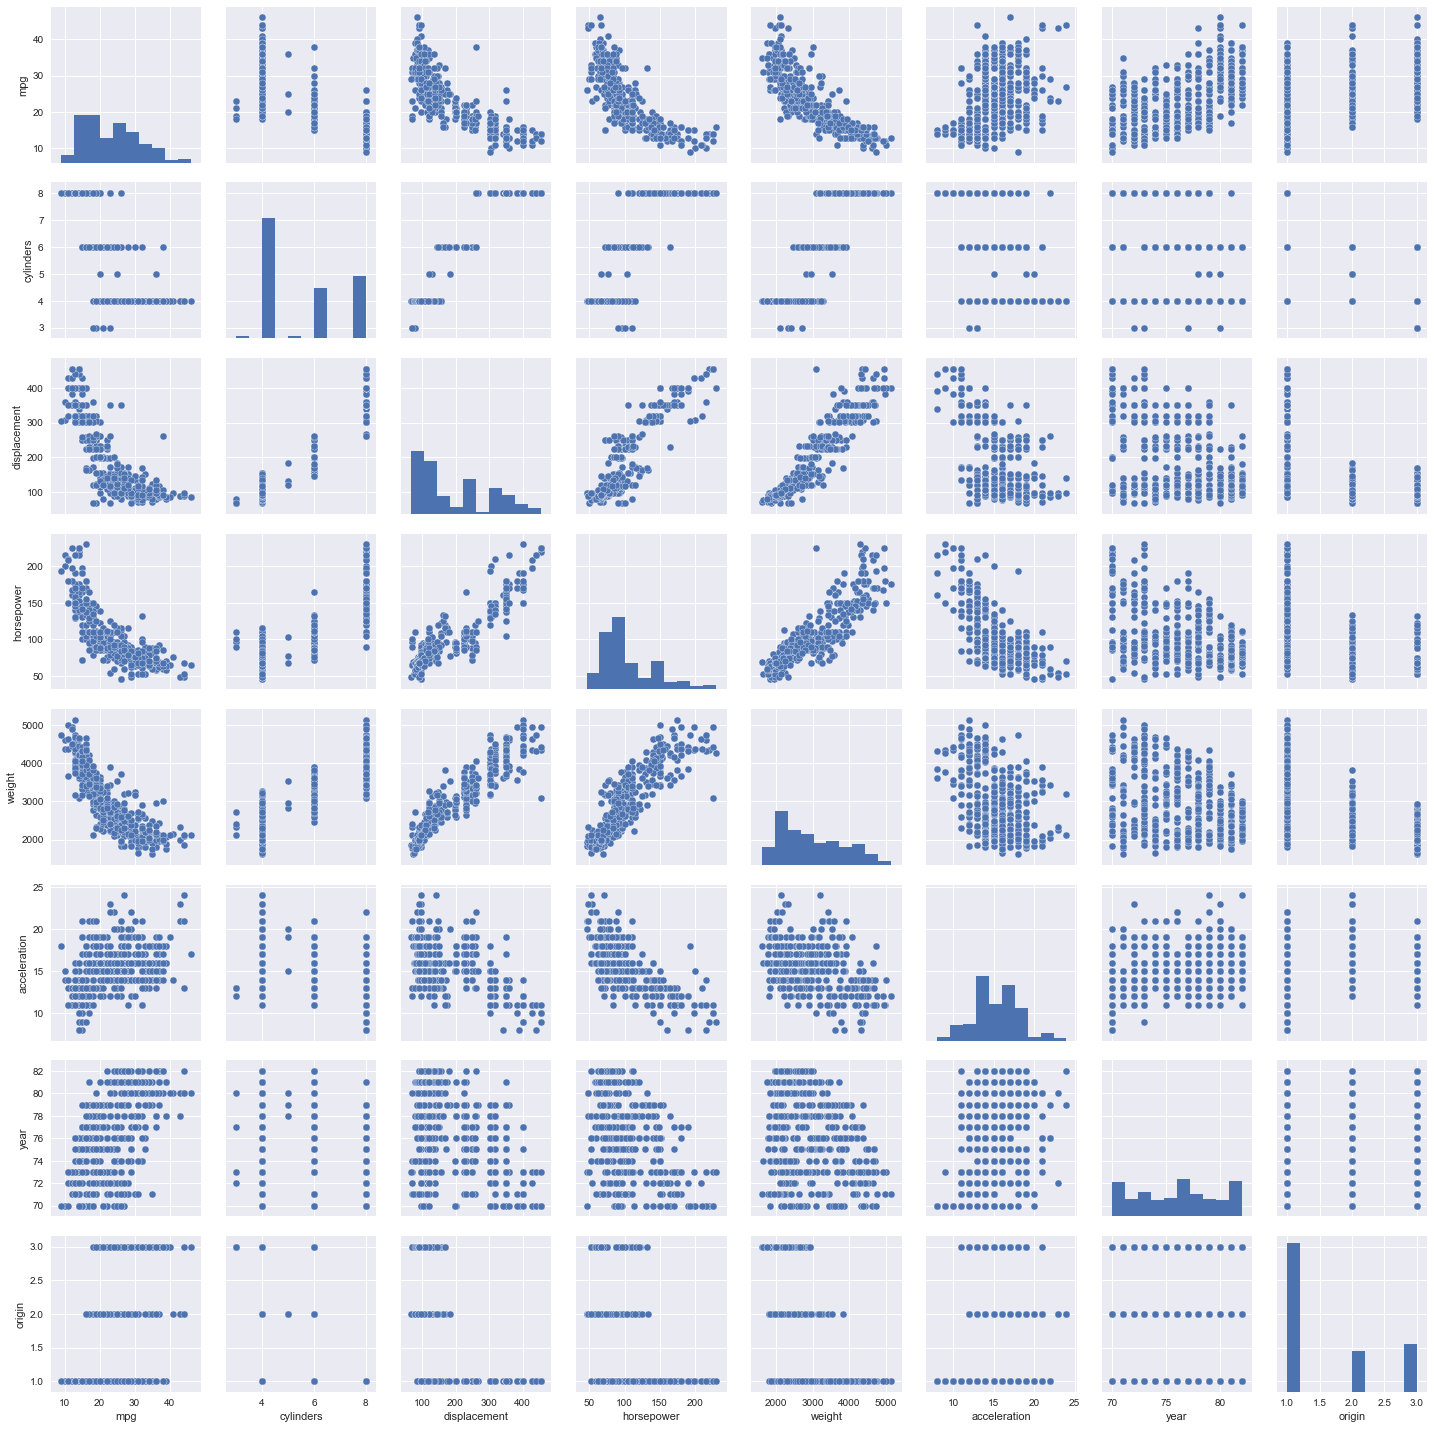

In [14]:
%matplotlib inline
new_df = auto_df.drop(['name'], axis=1)
new_df = new_df.astype(int)
sns.pairplot(new_df)

In [15]:
new_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.780143,-0.806765,-0.779415,-0.835080,0.403785,0.569008,0.567302
cylinders,-0.780143,1.000000,0.950823,0.842983,0.897527,-0.486055,-0.345647,-0.568932
displacement,-0.806765,0.950823,1.000000,0.897255,0.932996,-0.522269,-0.369838,-0.614519
horsepower,-0.779415,0.842983,0.897255,1.000000,0.864538,-0.673877,-0.416361,-0.455171
weight,-0.835080,0.897527,0.932996,0.864538,1.000000,-0.402713,-0.309120,-0.585005
acceleration,0.403785,-0.486055,-0.522269,-0.673877,-0.402713,1.000000,0.261773,0.198939
year,0.569008,-0.345647,-0.369838,-0.416361,-0.309120,0.261773,1.000000,0.181528
origin,0.567302,-0.568932,-0.614519,-0.455171,-0.585005,0.198939,0.181528,1.000000


### 9 c

In [16]:
#predict mpg using horsepower
y = new_df.mpg.astype(int)
X = new_df[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     246.4
Date:                Thu, 04 Jan 2018   Prob (F-statistic):          8.85e-138
Time:                        09:33:10   Log-Likelihood:                -1024.4
No. Observations:                 392   AIC:                             2065.
Df Residuals:                     384   BIC:                             2096.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.6144      4.690     -3.116      0.002     -23.835      -5.394
cylinders       -0.5302      0.324     -1.636      0.103      -1.168       0.107
displacement     0.0204      0.008      2.710      0.007       0.006       0.035
horsepower      -0.0177      0.014     -1.283      0.200      -0.045       0.009
weight          -0.0064      0.001    -10.002      0.000      -0.008      -0.005
acceleration     0.0783      0.097      0.808      0.420      -0.112       0.269
year             0.7167      0.051     13.984      0.000       0.616       0.817
origin           1.4294      0.279      5.128      0.000       0.881       1.977
==============================================================================
Omnibus:                       30.412   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.984
Skew:                           0.519   Prob(JB):                     2.31e-11
Kurtosis:                       4.386   Cond. No.                     8.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Here's what's up with mpg.
Significant  (p<.001) predictors of mpg include weight, year, origin.
higher weight, lower mpg.
later year, higher mpg. -- technological improvements.
origin "2 or 3", highermpg than origin "1"
I assume this is where the car was built.

Oh, I should add the overall fit at R-squared = %81, is pretty good.

[<matplotlib.text.Text at 0x117efcba8>, <matplotlib.text.Text at 0x117e2a940>]

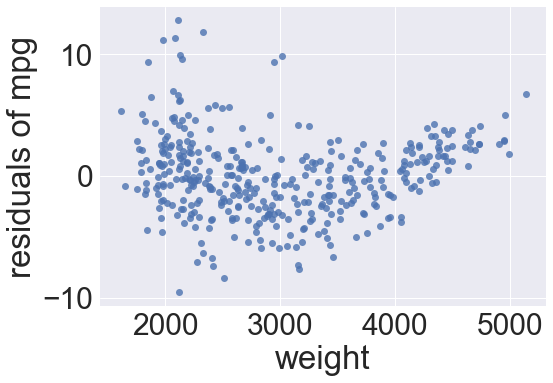

In [18]:
sns.set(font_scale=3)
ax = sns.regplot(new_df.weight.astype(int),results.resid,fit_reg=False)
ax.set(ylabel = 'residuals of mpg', xlabel = 'weight')




[<matplotlib.text.Text at 0x118c2f940>, <matplotlib.text.Text at 0x118ac05f8>]

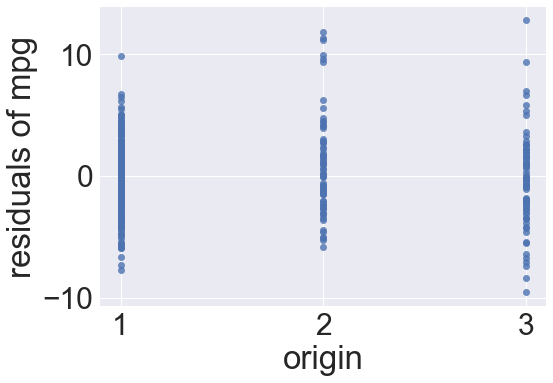

In [19]:
ax = sns.regplot(new_df.origin.astype(int),results.resid,fit_reg=False)
ax.set(ylabel = 'residuals of mpg', xlabel = 'origin')




[<matplotlib.text.Text at 0x119437358>, <matplotlib.text.Text at 0x118a2eac8>]

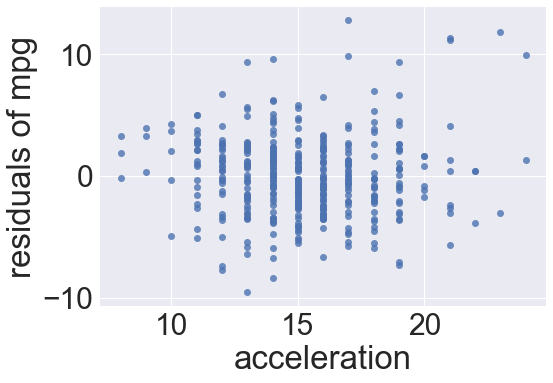

In [20]:
ax = sns.regplot(new_df.acceleration.astype(int),results.resid,fit_reg=False)
ax.set(ylabel = 'residuals of mpg', xlabel = 'acceleration')

### looks like there's a parabolic trend remaining in the weight residuals.

In [21]:
#predict mpg using horsepower
y = new_df.mpg.astype(int)
X = new_df[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()


In [22]:
test=new_df[['horsepower']]
test2=test**2
new_df['horsepower_sq']=test2

In [23]:
#predict mpg using horsepower
y = new_df.mpg.astype(int)
X = new_df[['cylinders','displacement','horsepower_sq','weight','acceleration','year','origin']]

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()


In [24]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     248.0
Date:                Thu, 04 Jan 2018   Prob (F-statistic):          3.32e-138
Time:                        09:33:11   Log-Likelihood:                -1023.4
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2094.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -19.5268      4.338     -4.501      0.000     -28.057     -10.997
cylinders        -0.3374      0.329     -1.025      0.306      -0.984       0.310
displacement      0.0110      0.008      1.404      0.161      -0.004       0.026
horsepower_sq  8.137e-05   4.27e-05      1.903      0.058   -2.68e-06       0.000
weight           -0.0071      0.001    -11.942      0.000      -0.008      -0.006
acceleration      0.2287      0.085      2.677      0.008       0.061       0.397
year              0.7528      0.051     14.844      0.000       0.653       0.853
origin            1.1959      0.281      4.250      0.000       0.643       1.749
==============================================================================
Omnibus:                       27.598   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.878
Skew:                           0.474   Prob(JB):                     1.80e-10
Kurtosis:                       4.360   Cond. No.                     4.14e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

woo! boosted it by .001 R-squared

[<matplotlib.text.Text at 0x119492fd0>, <matplotlib.text.Text at 0x11948f048>]

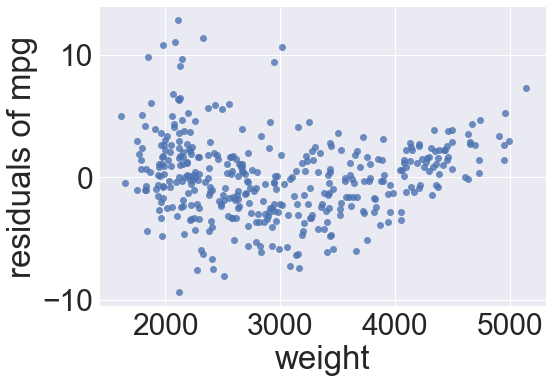

In [25]:
sns.set(font_scale=3)
ax = sns.regplot(new_df.weight.astype(int),results.resid,fit_reg=False)
ax.set(ylabel = 'residuals of mpg', xlabel = 'weight')




In [26]:
import patsy
import statsmodels.formula.api as smf

In [27]:
new_df=new_df.dropna()
model2 = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin + horsepower*weight', data=new_df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     293.1
Date:                Thu, 04 Jan 2018   Prob (F-statistic):          4.07e-158
Time:                        09:33:11   Log-Likelihood:                -973.42
No. Observations:                 392   AIC:                             1965.
Df Residuals:                     383   BIC:                             2001.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             5.7768      4.546      1.271      0.205      -3.161      14.714
cylinders            -0.0665      0.288     -0.231      0.818      -0.633       0.500
displacement          0.0067      0.007      0.997      0.320      -0.007       0.020
horsepower           -0.2338      0.024     -9.897      0.000      -0.280      -0.187
weight               -0.0113      0.001    -15.539      0.000      -0.013      -0.010
acceleration         -0.0898      0.087     -1.037      0.301      -0.260       0.081
year                  0.7326      0.045     16.248      0.000       0.644       0.821
origin                0.8335      0.251      3.316      0.001       0.339       1.328
horsepower:weight  5.575e-05   5.23e-06     10.661      0.000    4.55e-05     6.6e-05
==============================================================================
Omnibus:                       37.800   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.841
Skew:                           0.596   Prob(JB):                     5.05e-15
Kurtosis:                       4.616   Cond. No.                     1.24e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[<matplotlib.text.Text at 0x10a187390>, <matplotlib.text.Text at 0x10a180518>]

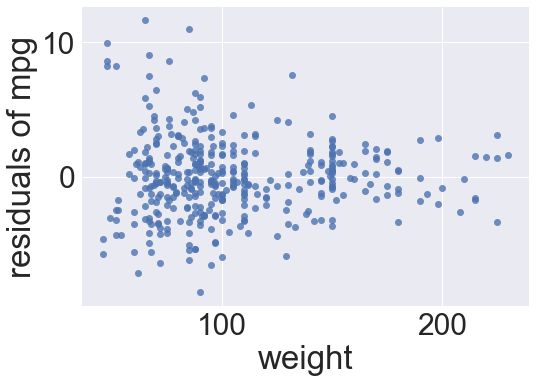

In [28]:
sns.set(font_scale=3)
ax = sns.regplot(new_df.horsepower.astype(int),model2.resid,fit_reg=False)
ax.set(ylabel = 'residuals of mpg', xlabel = 'weight')




### 10:

In [29]:
carseat_df  = pd.read_csv('islir_data/Carseats.csv')

In [30]:
carseat_df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [31]:
model3 = smf.ols(formula='Sales ~ Population + Urban + US', data= carseat_df)

In [32]:
results3=model3.fit()

In [33]:
results3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4.563
Date:                Thu, 04 Jan 2018   Prob (F-statistic):            0.00371
Time:                        09:33:12   Log-Likelihood:                -975.56
No. Observations:                 400   AIC:                             1959.
Df Residuals:                     396   BIC:                             1975.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.7262      0.401     16.776      0.000       5.938       7.514
Urban[T.Yes]    -0.1341      0.306     -0.438      0.662      -0.736       0.468
US[T.Yes]        1.0361      0.292      3.547      0.000       0.462       1.610
Population       0.0007      0.001      0.781      0.435      -0.001       0.003
==============================================================================
Omnibus:                        1.651   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.620
Skew:                           0.155   Prob(JB):                        0.445
Kurtosis:                       2.973   Cond. No.                     1.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### This model demonstrates that status: in the us is a significant predictor of sales. Specifically, sales are slightly higher there. Population and urbanicity are not significant predictors.

I guess the other thing I should say is this is not a very good model, explaining about 3% of the variance.

d - for which of the predictors can we reject the null?
    Depends on your significance threshold, but really, it's the US  status one.
    
    

In [34]:
model4 = smf.ols(formula='Sales~ US', data=carseat_df).fit()

In [35]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     12.89
Date:                Thu, 04 Jan 2018   Prob (F-statistic):           0.000372
Time:                        09:33:12   Log-Likelihood:                -975.98
No. Observations:                 400   AIC:                             1956.
Df Residuals:                     398   BIC:                             1964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8230      0.234     29.215      0.000       6.364       7.282
US[T.Yes]      1.0439      0.291      3.590      0.000       0.472       1.616
==============================================================================
Omnibus:                        1.471   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.479   Jarque-Bera (JB):                1.443
Skew:                           0.146   Prob(JB):                        0.486
Kurtosis:                       2.973   Cond. No.                         3.12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

####95% conf inf
0.472	1.616

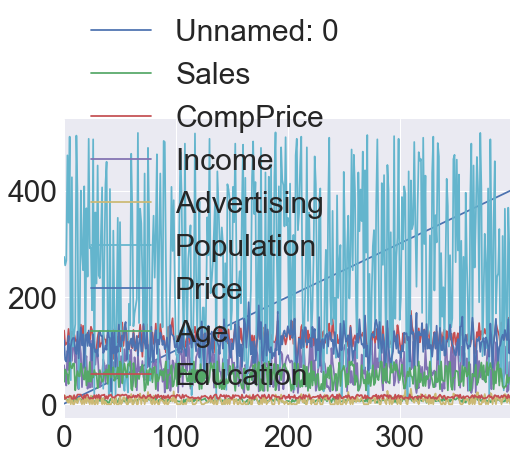

In [36]:
carseat_df.plot()


In [148]:
#Doing an investigation? That's cool
# 11.
import numpy as np
n = 100 #sample size
df = pd.DataFrame()
np.random.seed(1)
df['x'] = np.random.randn(n) #100 random numbers
df['y']=df.x*2+np.random.randn(n) #100 different random numbers, that are twice the first numbers, with some noise thrown in.

In [149]:
model = sm.OLS(df.y.values,df.x.values)

In [150]:
results=model.fit()

In [151]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Thu, 04 Jan 2018   Prob (F-statistic):           3.46e-36
Time:                        10:15:46   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

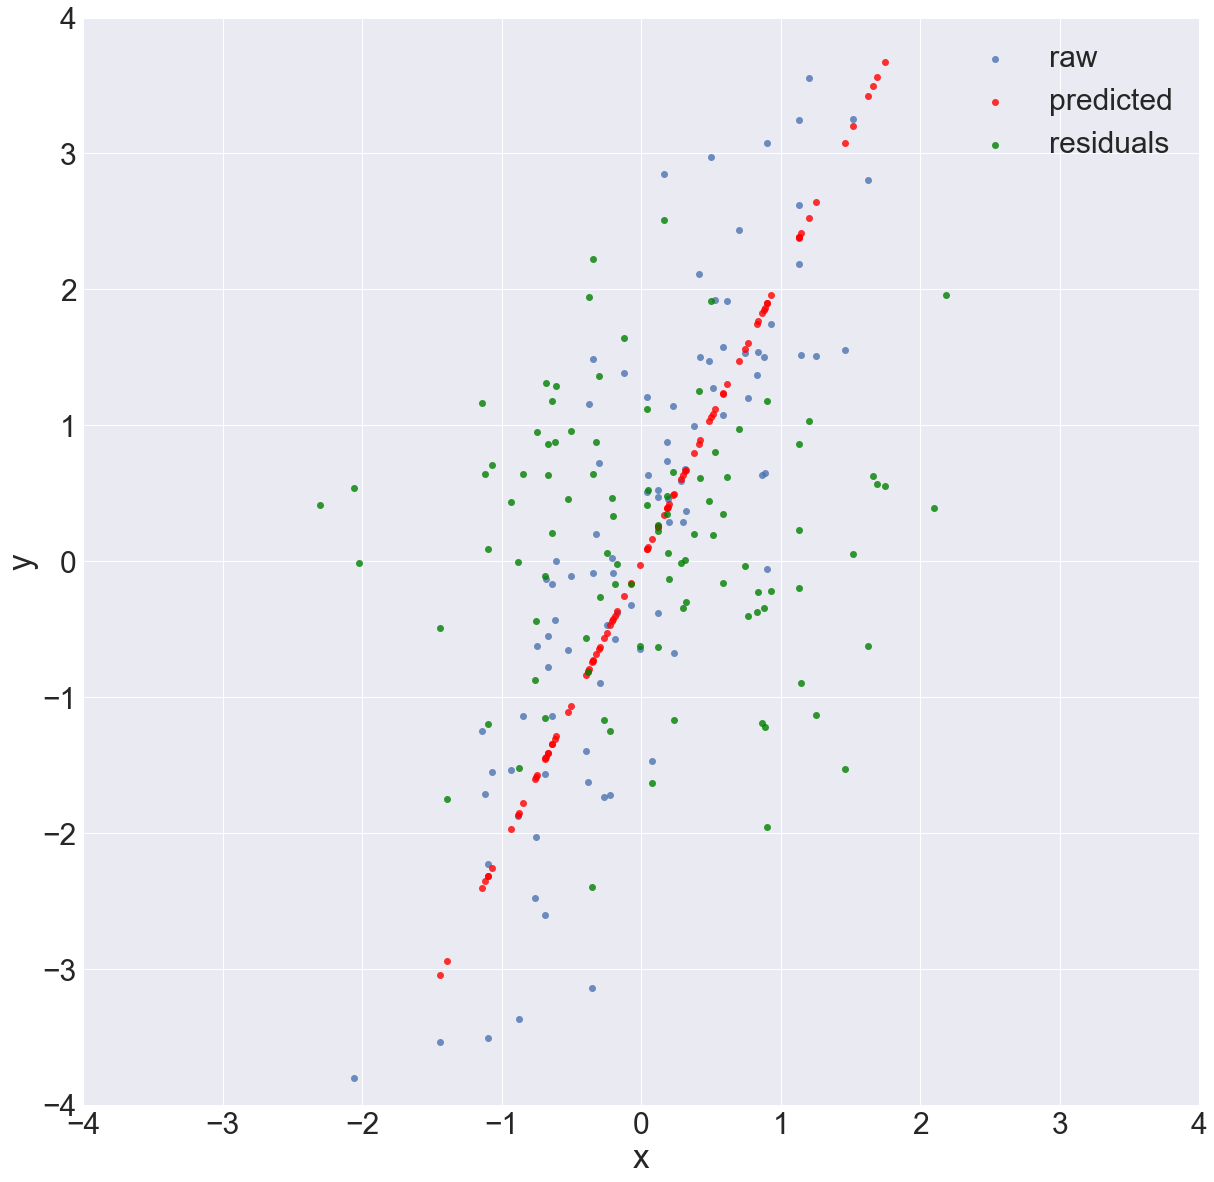

In [152]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.set(font_scale=3)
ax = sns.regplot(df.x.values,df.y.values,fit_reg=False)
sns.regplot(df.x.values,results.fittedvalues,fit_reg=False, color='red')
sns.regplot(df.x.values,results.resid,fit_reg=False, color='green')
ax.set(ylabel = 'y', xlabel = 'x', ylim=(-4,4), xlim=(-4,4))
ax.legend(labels=["raw","predicted","residuals"])
fig.set_size_inches(20,20)


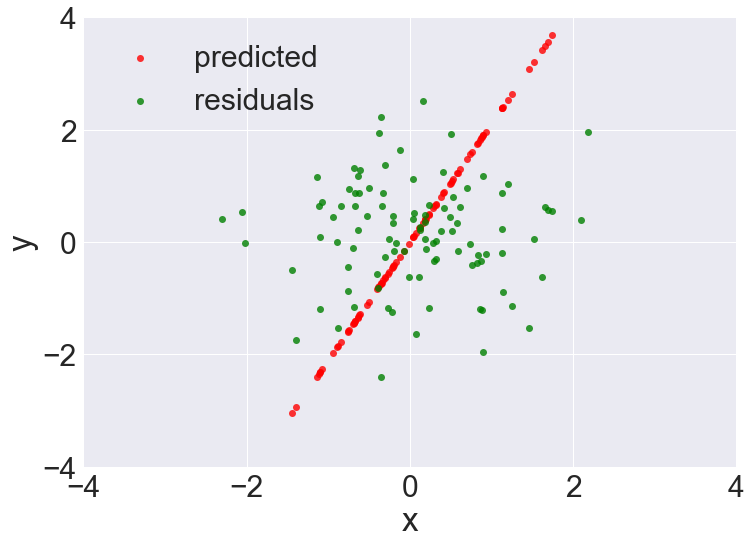

In [153]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.set(font_scale=3)
#sns.regplot(df.x.values,df.y.values,fit_reg=False)
sns.regplot(df.x.values,results.fittedvalues,fit_reg=False, color='red')
sns.regplot(df.x.values,results.resid,fit_reg=False, color='green')
ax.set(ylabel = 'y', xlabel = 'x', ylim=(-4,4), xlim=(-4,4))
ax.legend(labels=["predicted","residuals"])
fig.set_size_inches(11.7, 8.27)


Anyway, the coefficient, without the intercept, is  2.1067, which makes sense, given how the data was generated.


In [154]:
results.params #turns out this is the coeff!

array([ 2.10674169])

In [144]:
results.pvalues

array([  3.45737574e-36])

	coef	std err	t	P>|t|	[0.025	0.975]
x1	2.1067	0.106	19.792	0.000	1.896	2.318
So t = 19.792
p = 0.0000
This means that we can reject the null hypothesis that B = 0

In [168]:
constant_x = sm.add_constant(df[['x']])


In [170]:
model2=sm.OLS(df.y,constant_x)

In [171]:
results2 = model2.fit()

In [172]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Thu, 04 Jan 2018   Prob (F-statistic):           5.39e-36
Time:                        10:20:21   Log-Likelihood:                -134.44
No. Observations:                 100   AIC:                             272.9
Df Residuals:                      98   BIC:                             278.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1470      0.094      1.564      0.121      -0.039       0.334
x              2.0954      0.106     19.783      0.000       1.885       2.306
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.561
Skew:                          -0.172   Prob(JB):                        0.755
Kurtosis:                       3.127   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     391.7
Date:                Thu, 04 Jan 2018   Prob (F-statistic):           3.46e-36
Time:                        10:23:59   Log-Likelihood:                -135.67
No. Observations:                 100   AIC:                             273.3
Df Residuals:                      99   BIC:                             275.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.1067      0.106     19.792      0.000       1.896       2.318
==============================================================================
Omnibus:                        0.880   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.644   Jarque-Bera (JB):                0.554
Skew:                          -0.172   Prob(JB):                        0.758
Kurtosis:                       3.119   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Not really sure what they wanted me to get out of this. We still reject the null. The coeffcients are still significant for B1, not for the intercept though.

<img src='formula_3_8_8.png'>

So, to review, the estimate of the regression coefficient is equal to the sum of our x times our y value over that x value squared. That, frustratringly, goes right over my head. Why is it XY/X2 for each row?

Show algebraicly that the t statistic can be rewritten as:
<img src='t_stat_formula.png'>

So I guess I'ma give this a shot.

So I did it...

<img src ='my_calcs.png'>

And from this I'm supposed to argue that y ~ x = x ~y.

Skip. It takes too long. What I would do is do the same thing as before, but swapping y and x, and try to get the same result.

### Question 12:

Under what circumstance is the coefficient for X regressed onto Y the same as Y onto X.
<img src='formula_3_8_8.png'>


I think I need calculus, skip.

Although https://github.com/jstjohn/IntroToStatisticalLearningR-/blob/master/R_Exercises/Exercise2/Exercise2.Rmd

indicates that they should be the same when the coefficient is 1. That is, when they're exactly the same. I suppose that makes sense.